<div style="border:solid green 2px; padding: 20px" class="alert alert-info">
    <b> 1. Получение данных</b>
</div>

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st 
import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Загрузка данных
df = pd.read_csv('/datasets/games.csv', sep=',')
display(df.head(10))
display(df.tail(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


<div style="border:solid green 2px; padding: 20px" class="alert alert-info">
    <b> 2. Подготовка данных</b>
</div>

In [3]:
# Приведем названия колонок к нормальным
colm = df.columns.str.lower()
df.columns = colm.to_list()
display(df.head(2))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


In [4]:
# Первый взгляд на данные
df.info()
display(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [5]:
# Замена типа данных и заполнение
# Удалим значения и заполним нулями там где это необходимо

df = df.dropna(subset = ['name', 'genre', 'year_of_release']) #year_of_release?

df = df.fillna(0)

df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y', errors='coerce')
df['year'] = df['year_of_release'].dt.year

print(pd.unique(df['critic_score']))
print()
print(pd.unique(df['user_score']))
print()
print(pd.unique(df['rating']))

# "tbd" данное сокращение переводится как "подлежит уточнению", а так как, ни кто ничего уточнять не будет заменим средним (3,8)
tbd = df[df['user_score'] == 'tbd']
tbd_mean = df[df['user_score'] != 'tbd']
tbd_mean = tbd_mean['user_score'].astype('float').mean()
df['user_score'] = round(df['user_score'].replace('tbd', tbd_mean).astype(float), 1)


# Сумма продаж по регионам
df['reg_sum_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

display(df.head(7))

[76.  0. 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]

['8' 0 '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']

['E' 0 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,reg_sum_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2006,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,0.0,0.0,0,1985,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,0,1996,31.38
5,Tetris,GB,1989-01-01,Puzzle,23.20,2.26,4.22,0.58,0.0,0.0,0,1989,30.26
6,New Super Mario Bros.,DS,2006-01-01,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,2006,29.80


<div style="border:solid green 2px; padding: 20px" class="alert alert-info">
    <b> 3. Исследование данных</b>
</div>

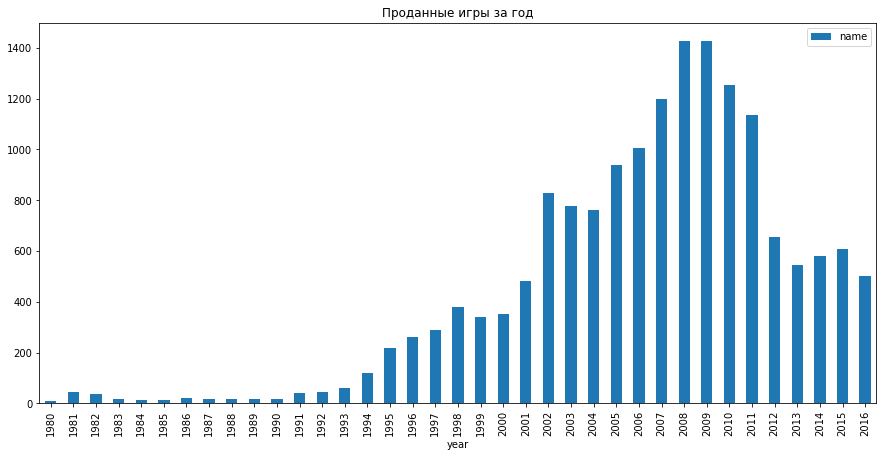

In [6]:
# количество игр по годам

game_year = df.pivot_table(index='year', values='name', aggfunc='count').reset_index()
#display(game_year)
game_year.plot(kind='bar', x='year', y='name', title='Проданные игры за год', figsize=(15, 7)) 

<div style="border:dashed red 2px; padding: 20px" class="alert alert-info">
    <b>Вывод</b>
    <p>Видно что рост идет скачкаобразно, видимо это связано с развитием технологий</p>
</div>

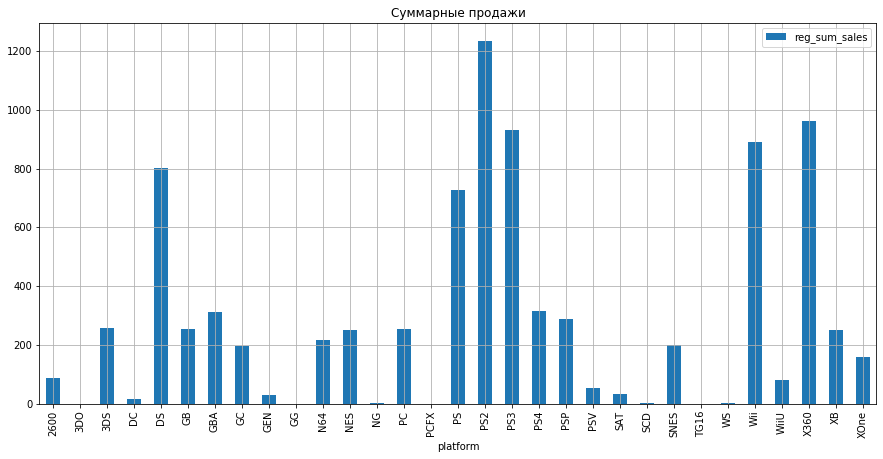

In [7]:
# продажи по платформам
game_platform = df.pivot_table(index=['platform'],
                               values=['reg_sum_sales'],
                               aggfunc='sum').reset_index()

game_platform.plot(kind='bar', x='platform', y='reg_sum_sales', title='Суммарные продажи', figsize=(15, 7), grid=True) 

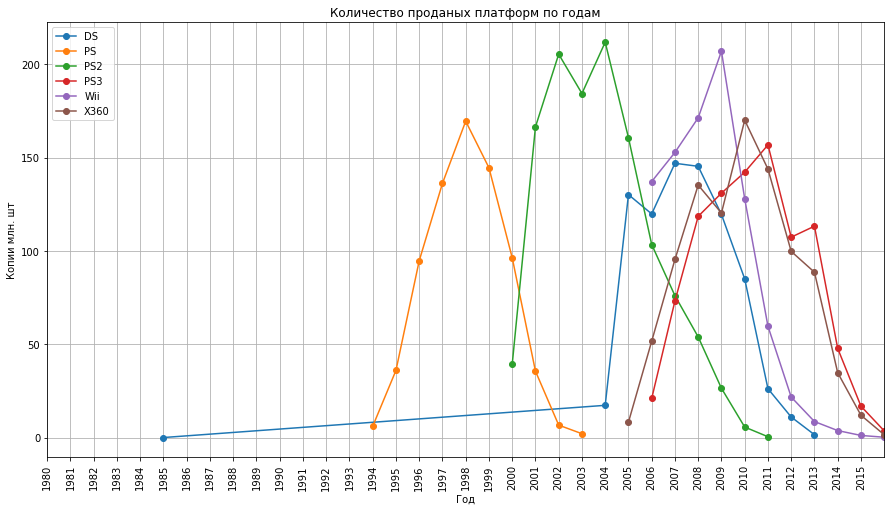

In [8]:
# отсеим все что меньше 350
game_platform = game_platform[game_platform['reg_sum_sales'] >= 350]
game_platform = pd.unique(game_platform['platform'])
#print (game_platform)

# построим графики

for platf in game_platform:
    (       
    df[df['platform'] == platf]
    .groupby('year')['reg_sum_sales'].sum()    
    .plot(figsize=(15,8), label=platf, marker='o', grid='True')     
    )

plt.legend(loc='upper left')
plt.xticks(range(1980, 2016))
plt.xlabel('Год')
plt.xticks(rotation=90)
plt.ylabel('Копии млн. шт')
plt.title('Количество проданых платформ по годам')
plt.show()

#Другой, доработать цветовую палитру, вариант https://pypi.org/project/bar-chart-race/

<div style="border:dashed red 2px; padding: 20px" class="alert alert-info">
    <b>Вывод</b>
    <p>В среднем продолжительность жизни платформы 10 лет, но есть и исключения</p>
</div>

In [9]:
# Берем срез данных 'актуальный период' 
# Срез решил сделать по 2006 году так как там наблюдается один из больших всплесков.
new_df = df[df['year'] >= 2012]
new_df = new_df[new_df['year'] <= 2015]
display(new_df.head(2)) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,reg_sum_sales
16,Grand Theft Auto V,PS3,2013-01-01,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,2013,21.05
23,Grand Theft Auto V,X360,2013-01-01,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,2013,16.27


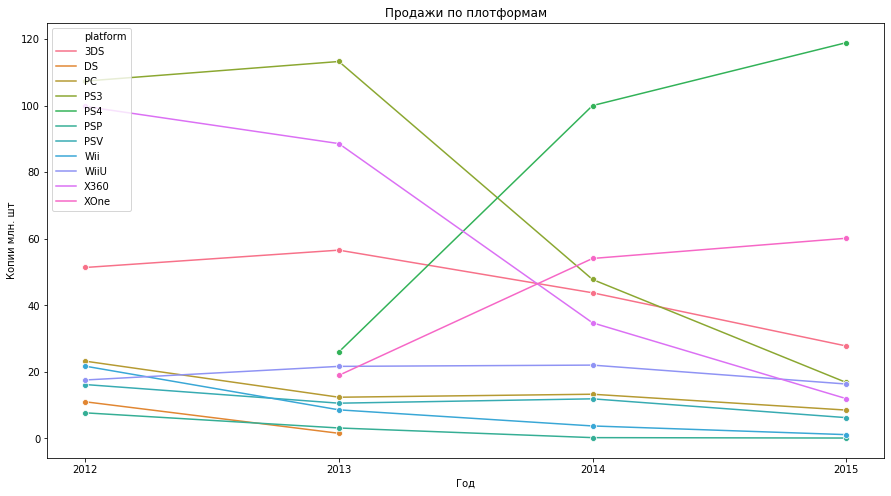

['3DS', 'PS3', 'PS4', 'X360', 'XOne']

In [10]:
# Выбираем выгодные платформы 

exselent_platform = (new_df 
                     .pivot_table(index=['platform','year'], values='reg_sum_sales', aggfunc='sum')
                     .reset_index()
                    )

plt.figure(figsize=(15,8))
plt.style.use('seaborn-deep')
sns.lineplot(data=exselent_platform, x='year', y='reg_sum_sales', hue='platform', marker='o')

plt.legend(loc='upper left')
plt.xticks(range(2012, 2016))
plt.xlabel('Год')
plt.ylabel('Копии млн. шт')
plt.title('Продажи по плотформам')
plt.show()

good_platform = (exselent_platform
                .groupby('platform').agg({'reg_sum_sales':'sum'})
                .reset_index()
                )
good_platform = good_platform[good_platform['reg_sum_sales'] > 100]
good_platform = good_platform['platform'].tolist()
display(good_platform)

<div style="border:dashed red 2px; padding: 20px" class="alert alert-info">
    <b>Вывод</b>
    <p>По графику видно что лидируют две плотформы, которые появились в 2013 их и 
       возьмем и для разнообразия еще парочку другую.
    </p>
    <p>
       Выбрал следующие платформы '3DS', 'PS3', 'PS4', 'X360', 'XOne' .
    </p>
    <p>     
       Лидерами оказались: 'PS4', 'X360',
    </p>
</div>

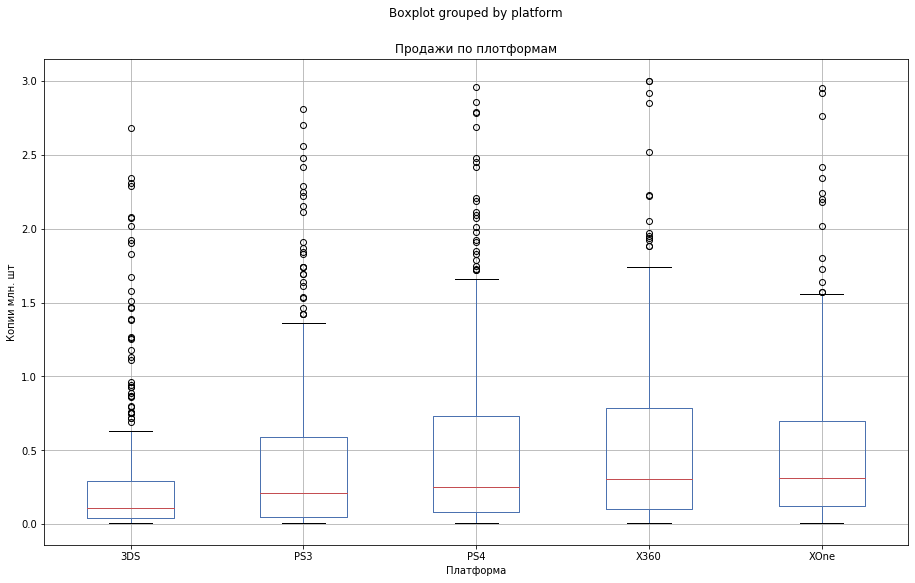

In [11]:
# построим усы
game_box = new_df.query('platform in @good_platform')
game_box = game_box[game_box['reg_sum_sales'] <= 3]
game_box.boxplot('reg_sum_sales', by='platform', figsize=(15,9))

plt.xlabel('Платформа')
plt.ylabel('Копии млн. шт')
plt.title('Продажи по плотформам')
plt.show()

<div style="border:dashed red 2px; padding: 20px" class="alert alert-info">
    <b>Вывод</b>
    <p>Можно сделать выводы, что больше всего продовались PS4 и X360 в период с 2012 по 2015 годы </p>
</div>

-------------------------------------- 3DS ----------------------------------------


,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,year,reg_sum_sales
na_sales,1.000000,0.957552,0.755383,0.993035,0.335420,0.226424,-0.130886,0.964533
eu_sales,0.957552,1.000000,0.826612,0.981020,0.309868,0.203354,-0.105877,0.982217
jp_sales,0.755383,0.826612,1.000000,0.778040,0.348216,0.285723,0.013700,0.893766
other_sales,0.993035,0.981020,0.778040,1.000000,0.322502,0.212335,-0.121928,0.976324
critic_score,0.335420,0.309868,0.348216,0.322502,1.000000,0.743066,0.185363,0.348740
user_score,0.226424,0.203354,0.285723,0.212335,0.743066,1.000000,0.224473,0.248970
year,-0.130886,-0.105877,0.013700,-0.121928,0.185363,0.224473,1.000000,-0.085169
reg_sum_sales,0.964533,0.982217,0.893766,0.976324,0.348740,0.248970,-0.085169,1.000000


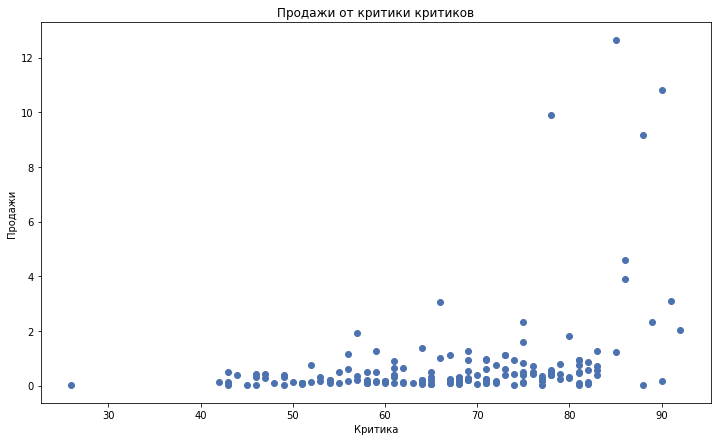

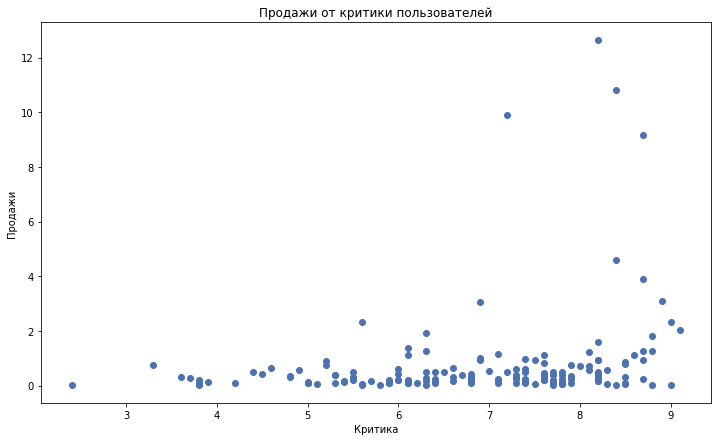

-------------------------------------- PS3 ----------------------------------------


,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,year,reg_sum_sales
na_sales,1.000000,0.826680,0.380498,0.872466,0.454413,0.173822,-0.053523,0.940527
eu_sales,0.826680,1.000000,0.421490,0.978143,0.382536,0.130541,0.020449,0.962073
jp_sales,0.380498,0.421490,1.000000,0.420342,0.202937,0.186203,0.105950,0.495844
other_sales,0.872466,0.978143,0.420342,1.000000,0.394883,0.150749,0.002588,0.975522
critic_score,0.454413,0.382536,0.202937,0.394883,1.000000,0.631360,-0.001309,0.432759
user_score,0.173822,0.130541,0.186203,0.150749,0.631360,1.000000,-0.023758,0.168896
year,-0.053523,0.020449,0.105950,0.002588,-0.001309,-0.023758,1.000000,-0.003547
reg_sum_sales,0.940527,0.962073,0.495844,0.975522,0.432759,0.168896,-0.003547,1.000000


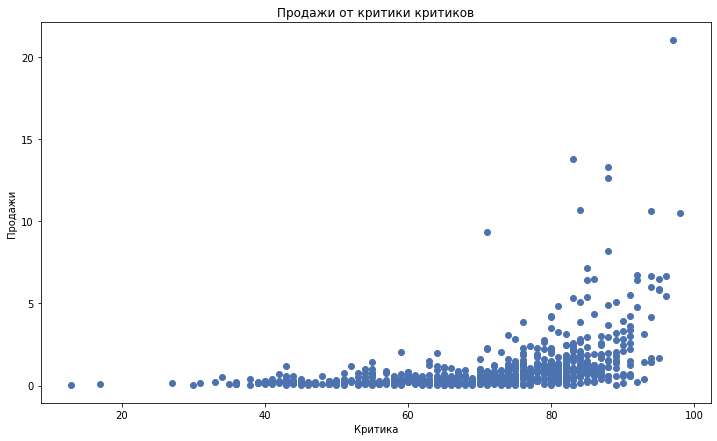

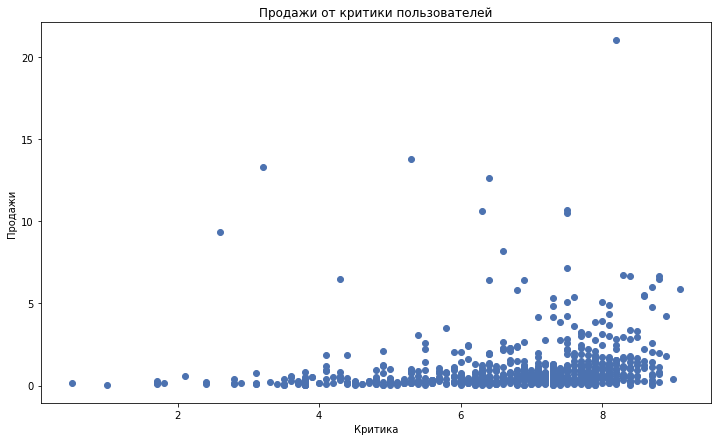

-------------------------------------- PS4 ----------------------------------------


,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,year,reg_sum_sales
na_sales,1.000000,0.715634,0.531651,0.915508,0.414338,-0.013213,-0.264948,0.894083
eu_sales,0.715634,1.000000,0.520906,0.935271,0.346257,-0.041681,-0.194536,0.951751
jp_sales,0.531651,0.520906,1.000000,0.567832,0.322303,0.180345,-0.126718,0.593261
other_sales,0.915508,0.935271,0.567832,1.000000,0.408603,-0.027555,-0.235597,0.997802
critic_score,0.414338,0.346257,0.322303,0.408603,1.000000,0.551234,-0.021289,0.406002
user_score,-0.013213,-0.041681,0.180345,-0.027555,0.551234,1.000000,0.130878,-0.023790
year,-0.264948,-0.194536,-0.126718,-0.235597,-0.021289,0.130878,1.000000,-0.237863
reg_sum_sales,0.894083,0.951751,0.593261,0.997802,0.406002,-0.023790,-0.237863,1.000000


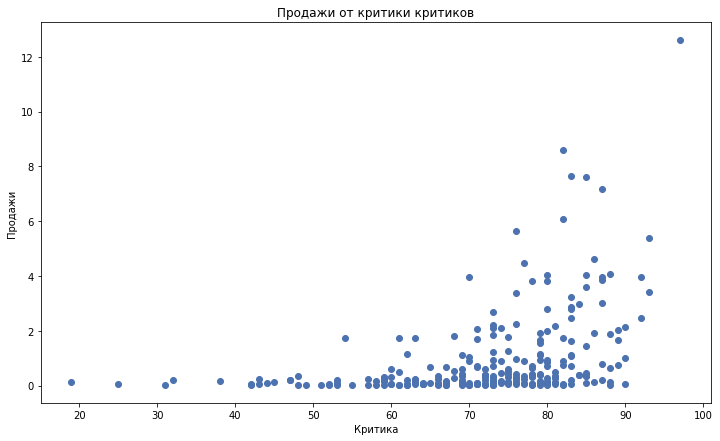

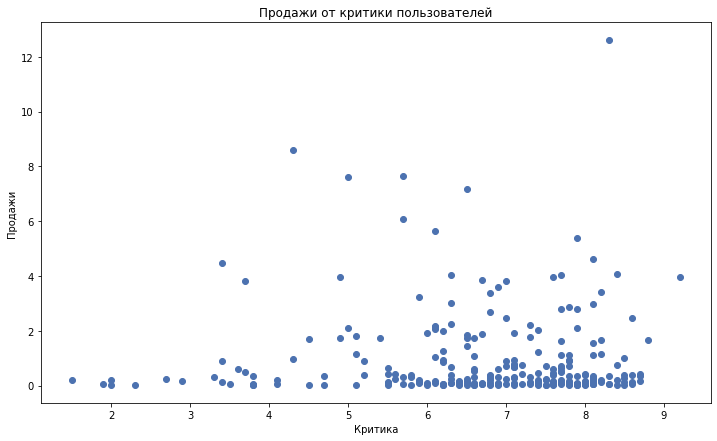

-------------------------------------- X360 ----------------------------------------


,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,year,reg_sum_sales
na_sales,1.000000,0.867620,0.519002,0.967008,0.376460,0.121113,0.039782,0.986086
eu_sales,0.867620,1.000000,0.499493,0.953341,0.384812,0.130730,0.112467,0.937771
jp_sales,0.519002,0.499493,1.000000,0.537956,0.284054,0.186742,-0.078595,0.540111
other_sales,0.967008,0.953341,0.537956,1.000000,0.401606,0.140609,0.051197,0.992837
critic_score,0.376460,0.384812,0.284054,0.401606,1.000000,0.622209,-0.004043,0.392666
user_score,0.121113,0.130730,0.186742,0.140609,0.622209,1.000000,-0.132462,0.130761
year,0.039782,0.112467,-0.078595,0.051197,-0.004043,-0.132462,1.000000,0.061381
reg_sum_sales,0.986086,0.937771,0.540111,0.992837,0.392666,0.130761,0.061381,1.000000


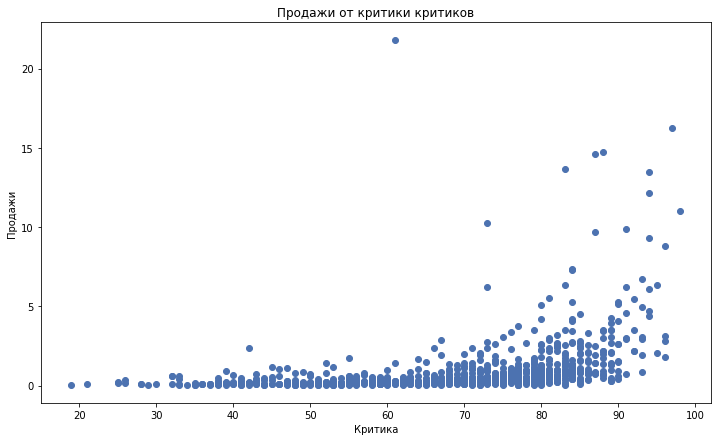

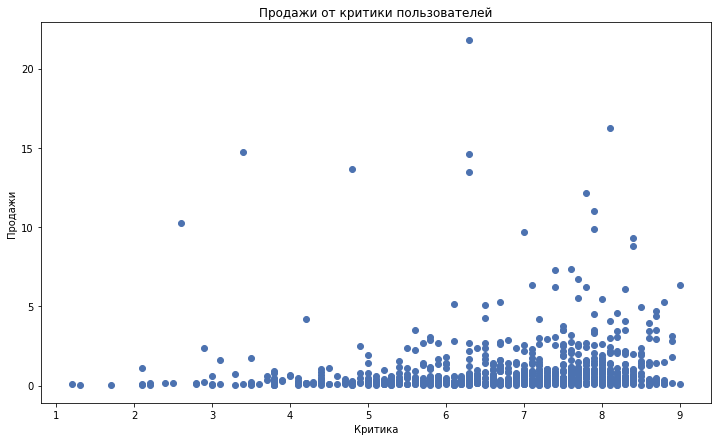

-------------------------------------- XOne ----------------------------------------


,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,year,reg_sum_sales
na_sales,1.000000,0.685841,0.402215,0.982971,0.386956,-0.066208,-0.268936,0.957272
eu_sales,0.685841,1.000000,0.383238,0.805472,0.377801,-0.051809,-0.200231,0.866950
jp_sales,0.402215,0.383238,1.000000,0.420586,0.202132,0.079770,-0.147181,0.432208
other_sales,0.982971,0.805472,0.420586,1.000000,0.410168,-0.067036,-0.269640,0.993241
critic_score,0.386956,0.377801,0.202132,0.410168,1.000000,0.485181,0.064050,0.415392
user_score,-0.066208,-0.051809,0.079770,-0.067036,0.485181,1.000000,0.085229,-0.065343
year,-0.268936,-0.200231,-0.147181,-0.269640,0.064050,0.085229,1.000000,-0.264044
reg_sum_sales,0.957272,0.866950,0.432208,0.993241,0.415392,-0.065343,-0.264044,1.000000


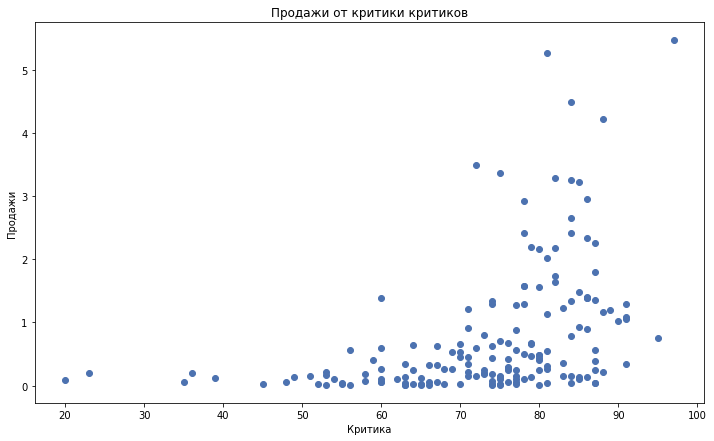

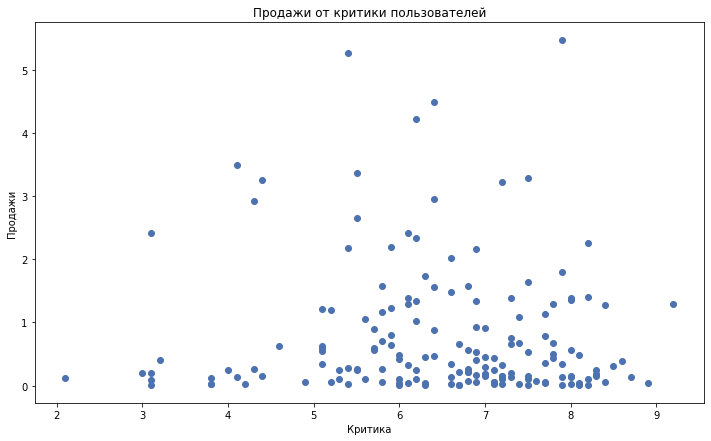

In [12]:
def platform(platform):
    df_x = df[df['platform'] == platform]
    df_x = df_x.query('user_score > 0')
    df_x = df_x.query('critic_score > 0')
    print('--------------------------------------', platform, '----------------------------------------')
    display(df_x.corr())
    #display(df_x.head())
  
    fig, ax = plt.subplots(figsize=(12, 7))
    ax.scatter(x = df_x['critic_score'], y = df_x['reg_sum_sales'])
    plt.xlabel('Критика')
    plt.ylabel('Продажи')
    plt.title('Продажи от критики критиков')
    plt.show()

    fig, ax = plt.subplots(figsize=(12, 7))
    ax.scatter(x = df_x['user_score'], y = df_x['reg_sum_sales'])
    plt.xlabel('Критика' )
    plt.ylabel('Продажи')
    plt.title('Продажи от критики пользователей')
    plt.show()
        
for i in good_platform:
    platform(i)     

<div style="border:dashed red 2px; padding: 20px" class="alert alert-info">
    <b>Вывод</b>
    <p>По графикам и по подсчетом видно, что зависимость продаж от критики есть </p>
    <p>однако можно сделать вывод, что зависимость от критики критиков больше чем от критики пользователей.</p>
    <p>данные расмотрены за период 2012 - 2015 год</p>
</div>

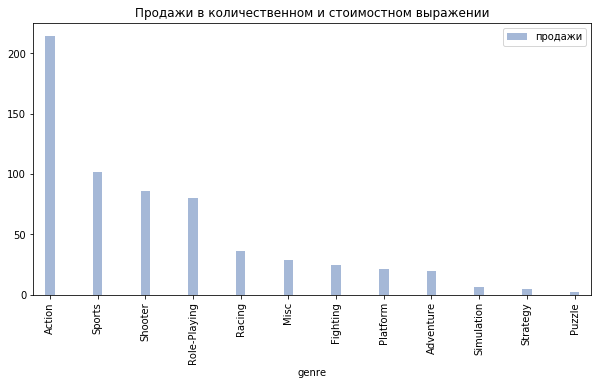

In [13]:
# Анализ по жанрам
gener_df = (game_box
                     .pivot_table(index=['genre'], values='reg_sum_sales', aggfunc='sum')
                     .reset_index()
                    )
gener_df = gener_df.sort_values(by='reg_sum_sales', ascending=False)

gener_df.plot(kind='bar', x='genre', y='reg_sum_sales', title='Продажи в количественном и стоимостном выражении', 
             label='продажи', alpha=0.5, width=0.2, figsize=(10, 5))

plt.show()

<div style="border:solid green 2px; padding: 20px" class="alert alert-info">
    <b> 4. Портрет пользователя по регионам</b>
</div>

In [14]:
# Самые популярные платформы
def reg_top_platform(group, reg_sels, col):
    pivot = game_box.groupby(group).agg({reg_sels:'sum'}).reset_index()
    if group == 'genre':
        pivot = pivot.sort_values(by=reg_sels, ascending=False).head(5) 
    piv = pivot[reg_sels]
    label = pivot[group]
    #print(pivot)
    color = {'C0', 'C1', 'C2', 'C3', 'C4'}
    sizes = piv 
    explode = [0.02, 0.02, 0.02, 0.02, 0.02]
    ax[col].pie(piv, colors=color,
                explode=explode, 
                autopct='%.1f%%', 
                shadow=True,
                labels=label
               )

<Figure size 432x288 with 0 Axes>

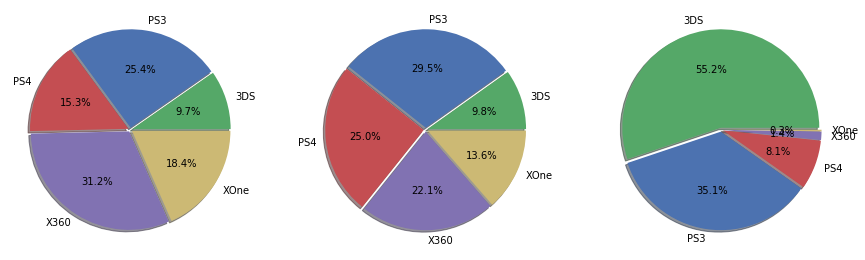

In [15]:
fig = plt.figure()
fig, ax = plt.subplots(1, 3, figsize=(15,5))

reg_top_platform('platform', 'na_sales', 0)
reg_top_platform('platform', 'eu_sales', 1)
reg_top_platform('platform', 'jp_sales', 2)

<div style="border:dashed red 2px; padding: 20px" class="alert alert-info">
    <b>Вывод</b>
    <p>Можно заметить, что от региона к региону количество продаж разное. </p>
</div>

<Figure size 432x288 with 0 Axes>

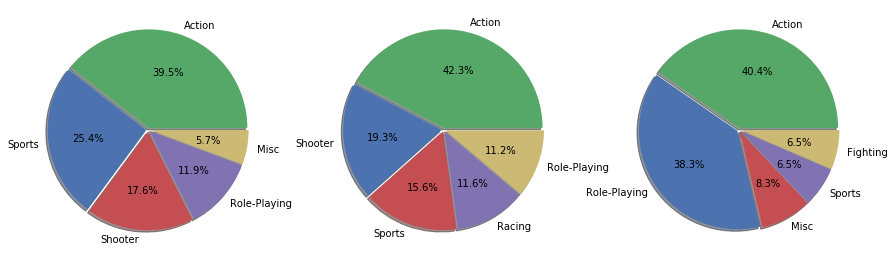

In [16]:
fig = plt.figure()
fig, ax = plt.subplots(1, 3, figsize=(15,5))
    
reg_top_platform('genre', 'na_sales', 0)
reg_top_platform('genre', 'eu_sales', 1)
reg_top_platform('genre', 'jp_sales', 2)

<div style="border:dashed red 2px; padding: 20px" class="alert alert-info">
    <b>Вывод</b>
    <p>
        Action любят везде, а вот если пытаться продовать игры по другим жанрам надо уже подумать там 
        процентные соотношения разные.  
    </p>
</div>

<Figure size 432x288 with 0 Axes>

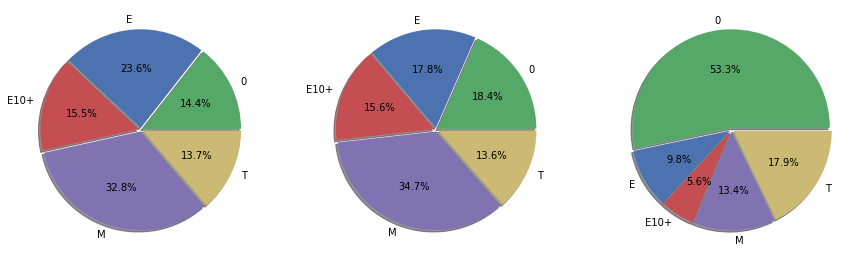

In [17]:
# Влияние ESRB по регионам
fig = plt.figure()
fig, ax = plt.subplots(1, 3, figsize=(15,5))
    
reg_top_platform('rating', 'na_sales', 0)
reg_top_platform('rating', 'eu_sales', 1)
reg_top_platform('rating', 'jp_sales', 2)

<div style="border:dashed red 2px; padding: 20px" class="alert alert-info">
    <b>Вывод</b>
    <p>
      Из графика видно, что рейтинг оказывает влияние на продажи.  
    </p>
</div>

<div style="border:solid green 2px; padding: 20px" class="alert alert-info">
    <b> 5. Гипотезы</b>
</div>

In [18]:
# Посмотрим дисперсии и среднии 
#display(df.head(25))
action = game_box.loc[game_box['genre'] == 'Action', 'user_score']
sport = game_box.loc[game_box['genre'] == 'Sports', 'user_score']

#display(action)

print('Дисперсия пользовательских оценок игр для жанра Action:',  action.var())
print()
print(action.describe())

print('Дисперсия пользовательских оценок игр для жанра Sports:',  sport.var())
print()
print(sport.describe())
print()

ps_4 = game_box.loc[game_box['platform'] == 'PS4', 'user_score']
x_one = game_box.loc[game_box['platform'] == 'XOne', 'user_score']

print('Дисперсия пользовательских оценок игр для жанра PS4:',  ps_4.var())
print()
print(ps_4.describe())

print('Дисперсия пользовательских оценок игр для жанра XOne:',  x_one.var())
print()
print(x_one.describe())
print()


Дисперсия пользовательских оценок игр для жанра Action: 11.632636099324218

count    505.000000
mean       3.944752
std        3.410665
min        0.000000
25%        0.000000
50%        4.900000
75%        7.200000
max        9.000000
Name: user_score, dtype: float64
Дисперсия пользовательских оценок игр для жанра Sports: 6.627221362229101

count    153.000000
mean       4.337255
std        2.574339
min        0.000000
25%        2.900000
50%        5.100000
75%        6.300000
max        8.200000
Name: user_score, dtype: float64

Дисперсия пользовательских оценок игр для жанра PS4: 11.261846963175511

count    205.000000
mean       4.482439
std        3.355868
min        0.000000
25%        0.000000
50%        6.200000
75%        7.400000
max        8.600000
Name: user_score, dtype: float64
Дисперсия пользовательских оценок игр для жанра XOne: 9.390886087429712

count    149.000000
mean       4.753020
std        3.064455
min        0.000000
25%        0.000000
50%        6.000000
75%

<div class="alert alert-info">
    <b>Гипотезы! </b>
    <p> Гипотеза для платформ:</p>
    <p> H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые </p>
    <p> H1: Рейтинги платформ Xbox One и PC разные </p>
    <p> Гипотеза для жанров:</p>
    <p> H0: Средние пользовательские рейтинги жанров Action и Sports равны </p>
    <p> H1: Средние пользовательские рейтинги жанров Action и Sports отличаются </p>
</div>

In [19]:
# Гипотеза платформы

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(ps_4, x_one)

print('p-значение:', results.pvalue)

if results.pvalue == alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

# Гипотиза жанры
print('-----------------------------------------------------------------------')

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(action, sport)

print('p-значение:', results.pvalue)

if results.pvalue == alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
# Описание в общих выводах    

p-значение: 0.4379295015745265
Не получилось отвергнуть нулевую гипотезу
-----------------------------------------------------------------------
p-значение: 0.1892107663850394
Не получилось отвергнуть нулевую гипотезу


<div style="border:solid green 2px; padding: 20px" class="alert alert-info">
    <b> 6. Общие выводы </b>
</div>

<div style="border:dashed red 2px; padding: 20px" class="alert alert-info">
    <b></b>
      <p><b></b></p>
    <p>
      Проведя исследования, можно рекомендавать выбрать одну из платформ  'PS4' или 'XOne', так как они появились на рынке           недавно  и показывают рост по ценам, но тут важно учитывать регион, где мы намеерены продовать, продажи зависят от               региона. Что касаестя жанров самый популярный Action и Sports, но есть различия. Action подойдет для всех регионов а вот       делая ставку на  Sports надо учесть регион.
    </p>
    <p>
      Было сформулировано две гипотезы для платформ и жанров. Опровергнуть ни одну из них не удалось, значит можно сделоть           вывод, что средний пользовательский рейтинг платформ Xbox One и PC одинаковой, по жанрам анологичная ситуация Action и           Sports имеют одинаковый средний пользовательский рейтинг.  
    </p>
</div>